In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
#This data set has completely random columns with no context to anything just like any company would provide you with during an Interview
#Load the Data Classified Data
df=pd.read_csv('KNN_Data.txt',index_col='Unnamed: 0')
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [48]:
df.shape

(1000, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [50]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000



Because the **KNN** classifier predicts the class of a given test observation
by identifying the observations that are nearest to it, the scale of the
variables matters. Any variables that are on a large scale will have a much
larger effect on the distance between the observations, and hence on the KNN
classifier, than variables that are on a small scale.

In [51]:
data_final_vars=df.columns.values.tolist()
y='TARGET CLASS'
X=[i for i in data_final_vars if i not in y]
y=df[y]
X=df[X]
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [52]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [53]:
from sklearn.preprocessing import StandardScaler
#Standardize the input Variables, don't include TARGET CLASS in input dataframe
scaler=StandardScaler()
train_x=scaler.fit_transform(X_train)
test_x=scaler.fit_transform(X_test)
X_test

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
463,0.803268,1.229948,0.888984,0.810779,0.870627,1.017118,1.415290,1.732826,1.061802,1.360474
894,0.339554,1.001721,1.174230,0.952639,0.750500,0.744198,1.278811,1.554230,0.967811,1.132597
973,0.335992,1.343007,0.826096,0.843359,0.957316,0.879287,1.300711,1.491727,1.100409,1.167220
632,0.659880,0.988763,0.734354,0.347386,1.023638,1.250902,1.320052,1.061816,0.873976,1.449525
34,1.223552,1.003471,0.498671,0.569840,0.986798,0.924053,0.869187,0.840512,1.579612,1.359450
...,...,...,...,...,...,...,...,...,...,...
464,0.482603,1.600646,0.708165,0.710523,0.998811,1.050672,1.197690,0.988643,0.710549,1.277487
772,1.255574,1.605008,1.125853,0.323111,0.917590,1.072510,0.942974,1.165937,0.998779,1.227580
554,0.781147,1.109581,1.538869,0.539637,0.934954,0.937723,1.169236,1.592446,0.841119,1.157468
884,1.187148,0.706962,0.309048,0.551653,0.881674,1.118552,0.944450,0.812287,1.357555,1.080331


In [54]:
## Using KNN
#Remember that we are trying to come up with a model to predict class label for test observation. We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(accuracy)
cfn=confusion_matrix(y_test,y_pred)
display(cfn)
cfr=classification_report(y_test,y_pred)
print(cfr)

0.908

array([[122,  13],
       [ 10, 105]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       135
           1       0.89      0.91      0.90       115

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



Text(0, 0.5, 'Error Rate')

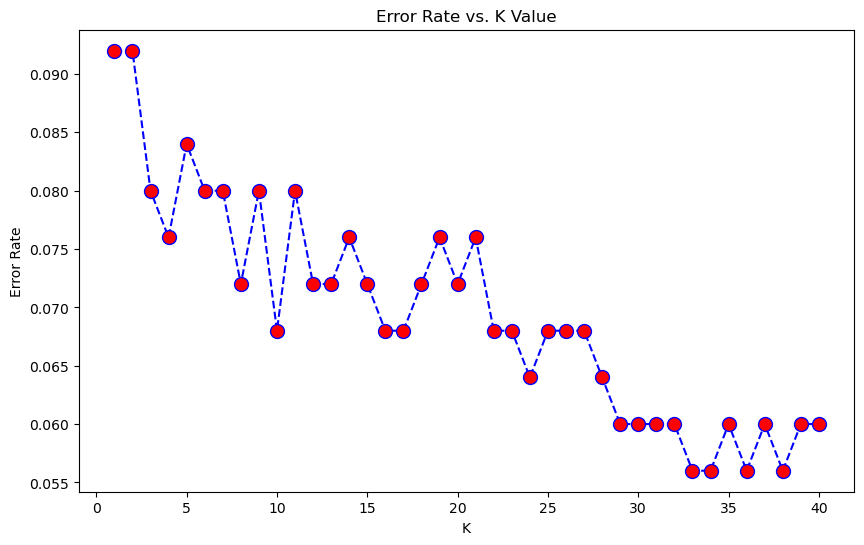

In [56]:
#Let's go ahead and use the elbow method to pick a good K Value:
error=[]
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_current = 1 - accuracy_score(y_test, y_pred)
    error.append(error_current)
# Will take some time


plt.figure(figsize=(10,6))

plt.plot(range(1,41),error, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')


In [57]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[125  10]
 [  5 110]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       135
           1       0.92      0.96      0.94       115

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [58]:
# NOW WITH K=23

knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))



WITH K=23


[[124  11]
 [  6 109]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       135
           1       0.91      0.95      0.93       115

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



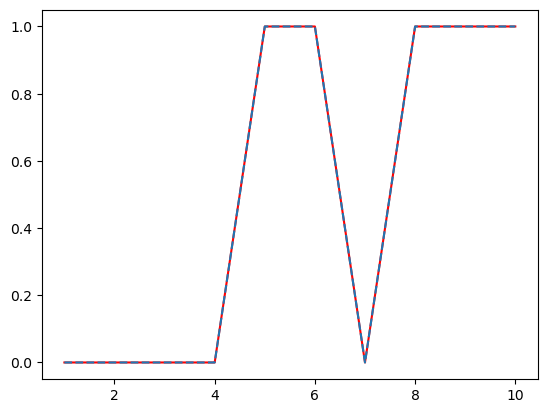

In [67]:
plt.plot(range(1,11),y_test[:10],color='red')
plt.plot(range(1,11),y_pred[:10],linestyle='dashed')